In [2]:
from datetime import date
import requests 
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
urllib3.disable_warnings()

today = date.today()
print("Today's date:", today)

Today's date: 2020-10-30


In [3]:
# get the data from the github to pandas
def getCSVfromGitHub(url):
    rqst = requests.get(url=url, verify = False).content 
    csvObj = pd.read_csv(io.StringIO(rqst.decode('utf8')))
    return csvObj

In [4]:
# covid19 confirmed cases csv
covid_19_cases = getCSVfromGitHub('https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_cases_switzerland_openzh.csv')
# covid19 deaths csv
covid_19_deaths = getCSVfromGitHub('https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_fatalities_switzerland_openzh.csv')
# covid19 deaths csv
covid_19_hospitalized = getCSVfromGitHub('https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_hospitalized_switzerland_openzh.csv')

In [5]:

url = 'https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_cases_switzerland_openzh.csv'
rqst = requests.get(url=url, verify = False).content 
covid_19_cases = pd.read_csv(io.StringIO(rqst.decode('utf8')))


In [6]:
# A quick look at the structure of the data (first row)
print(covid_19_cases.head(3))

         Date   AG  AI  AR  BE  BL   BS  FR   GE  GL  ...  VS_diff_pc  \
0  2020-02-25  NaN NaN NaN NaN NaN  NaN NaN  0.0 NaN  ...         NaN   
1  2020-02-26  1.0 NaN NaN NaN NaN  NaN NaN  1.0 NaN  ...         NaN   
2  2020-02-27  1.0 NaN NaN NaN NaN  1.0 NaN  1.0 NaN  ...         NaN   

   ZG_diff  ZG_pc  ZG_diff_pc  ZH_diff     ZH_pc  ZH_diff_pc  CH_diff  \
0      NaN    NaN         NaN      NaN       NaN         NaN      NaN   
1      NaN    NaN         NaN      NaN       NaN         NaN      5.0   
2      NaN    NaN         NaN      NaN  0.000001         NaN      4.0   

      CH_pc  CH_diff_pc  
0  0.000000         NaN  
1  0.000003    0.000003  
2  0.000006    0.000003  

[3 rows x 109 columns]


<Figure size 432x288 with 0 Axes>

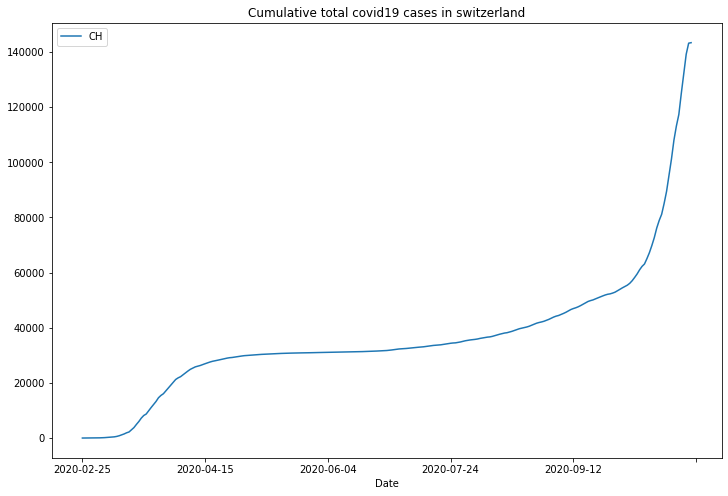

In [7]:
# Plotting the total cumulative cases
df = pd.DataFrame(covid_19_cases,columns=["Date","CH"])
plt.figure()
ax = df.set_index('Date').plot(kind="line",figsize=(12,8),title="Cumulative total covid19 cases in switzerland")
fig = ax.get_figure() 
fig.savefig('cumulative.jpg')

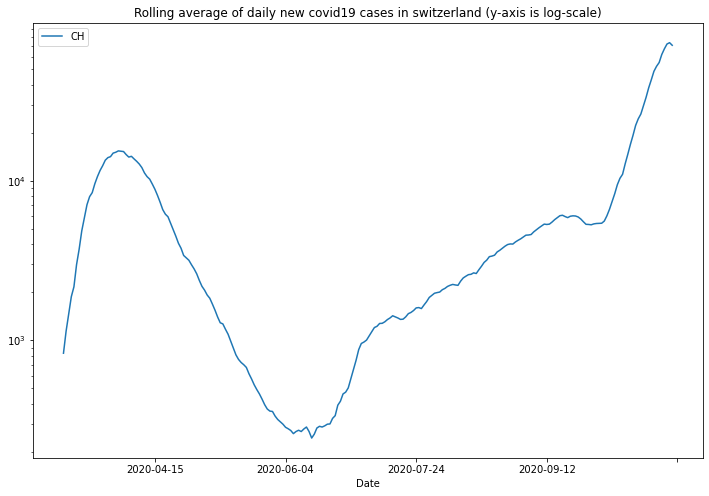

In [8]:
# Plotting the derivative
x = pd.DataFrame(covid_19_cases,columns=["Date"])
y = pd.DataFrame(covid_19_cases,columns=["CH"]).diff().rolling(15).sum()
newcases = pd.concat([x,y],axis = 1)
ax = newcases.set_index('Date').plot(kind="line",figsize=(12,8),title="Rolling average of daily new covid19 cases in switzerland (y-axis is log-scale)",logy=True)
fig = ax.get_figure()
fig.savefig('diff.jpg')

<Figure size 432x288 with 0 Axes>

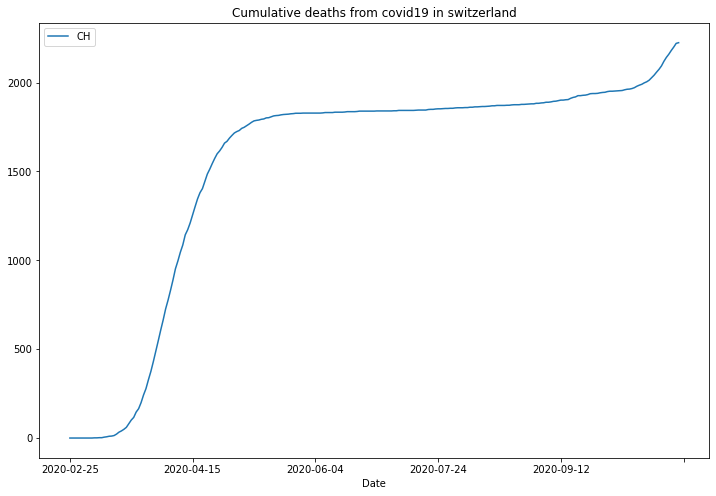

In [9]:
# Plotting the total cumulative cases
deaths = pd.DataFrame(covid_19_deaths,columns=["Date","CH"])
plt.figure()
ax = deaths.set_index('Date').plot(kind="line",figsize=(12,8),title="Cumulative deaths from covid19 in switzerland")
fig = ax.get_figure()
fig.savefig('deaths_cumulative.jpg')

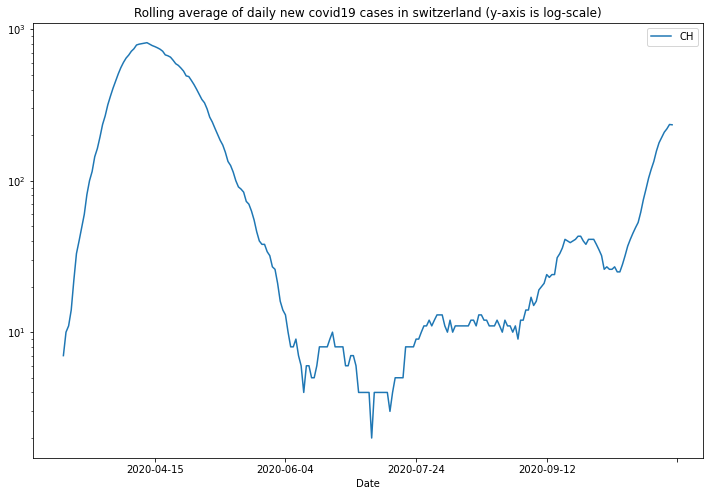

In [10]:
# Plotting the derivative
x = pd.DataFrame(covid_19_deaths,columns=["Date"])
y = pd.DataFrame(covid_19_deaths,columns=["CH"]).diff().rolling(15).sum()
newdeaths = pd.concat([x,y],axis = 1)
ax = newdeaths.set_index('Date').plot(kind="line",figsize=(12,8),title="Rolling average of daily new covid19 cases in switzerland (y-axis is log-scale)",logy=True)
fig = ax.get_figure()
fig.savefig('deaths_diff.jpg')

<Figure size 432x288 with 0 Axes>

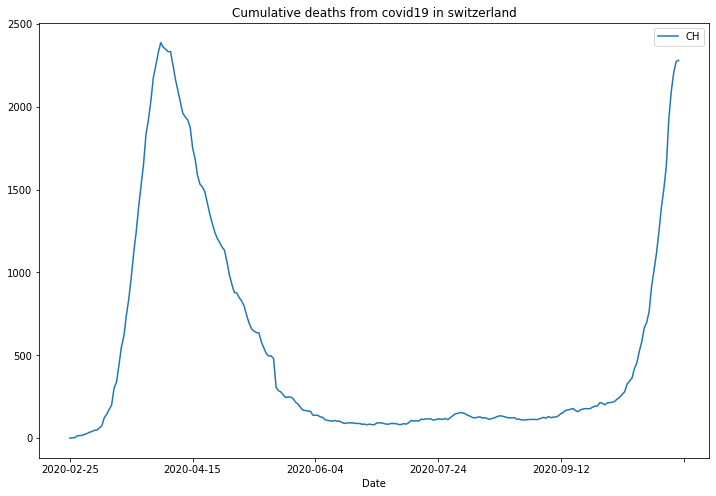

In [11]:
# Plotting the total cumulative cases
hospitalized = pd.DataFrame(covid_19_hospitalized,columns=["Date","CH"])
plt.figure()
ax = hospitalized.set_index('Date').plot(kind="line",figsize=(12,8),title="Cumulative deaths from covid19 in switzerland")
fig = ax.get_figure()

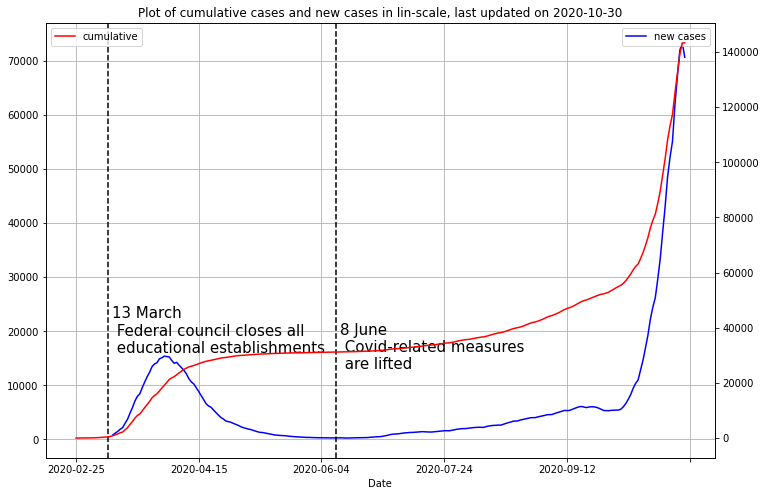

In [12]:
# Plotting the total cumulative cases together with the derivative
x = pd.DataFrame(covid_19_cases,columns=["Date"])
y = pd.DataFrame(covid_19_cases,columns=["CH"]).diff().rolling(15).sum()
newcases = pd.concat([x,y],axis = 1)

pTitle = "Plot of cumulative cases and new cases in lin-scale, last updated on "+str(today)

ax1 = newcases.set_index('Date').plot(color="blue",kind="line",grid=True, label='New Cases',figsize=(12,8),title = pTitle)
ax2 = df.set_index('Date').plot(color="red",kind="line",grid=True, label='Cumulative Cases',secondary_y=True,ax=ax1)


ax1.legend(["new cases"],loc=1)
ax2.legend(["cumulative"],loc=2)

ax1.axvline(13, color='k', linestyle='--',label="Interdiction des manifestations")
ax1.text(14.5,16000,"13 March \n Federal council closes all \n educational establishments",size=15)

ax1.axvline(106, color='k', linestyle='--',label="Interdiction des manifestations")
ax1.text(107.5,13000,"8 June \n Covid-related measures \n are lifted",size=15)

plt.show()
fig = ax1.get_figure()
fig.savefig('annotated.jpg')

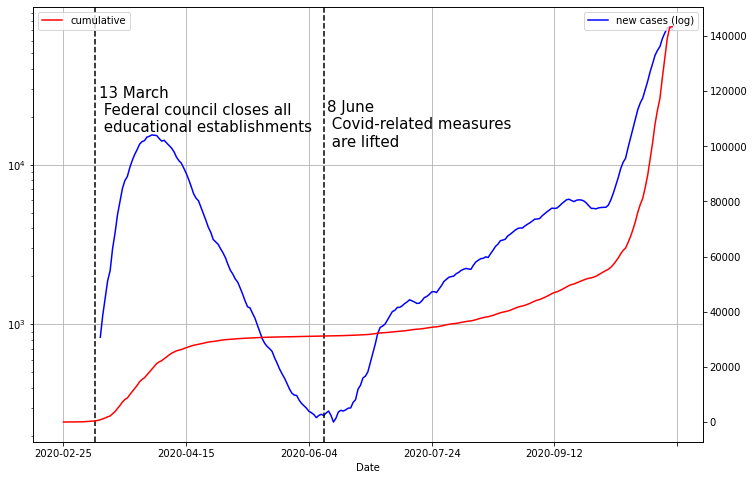

In [13]:
# Plotting the total cumulative cases together with the derivative but LOG
x = pd.DataFrame(covid_19_cases,columns=["Date"])
y = pd.DataFrame(covid_19_cases,columns=["CH"]).diff().rolling(15).sum()
newcases = pd.concat([x,y],axis = 1)



ax1 = newcases.set_index('Date').plot(color="blue",kind="line",grid=True, label='New Cases',figsize=(12,8),logy=True)
ax2 = df.set_index('Date').plot(color="red",kind="line",grid=True, label='Cumulative Cases',secondary_y=True,ax=ax1)


ax1.legend(["new cases (log)"],loc=1)
ax2.legend(["cumulative"],loc=2)

ax1.axvline(13, color='k', linestyle='--',label="Interdiction des manifestations")
ax1.text(14.5,16000,"13 March \n Federal council closes all \n educational establishments",size=15)

ax1.axvline(106, color='k', linestyle='--',label="Interdiction des manifestations")
ax1.text(107.5,13000,"8 June \n Covid-related measures \n are lifted",size=15)

plt.show()
fig = ax1.get_figure()

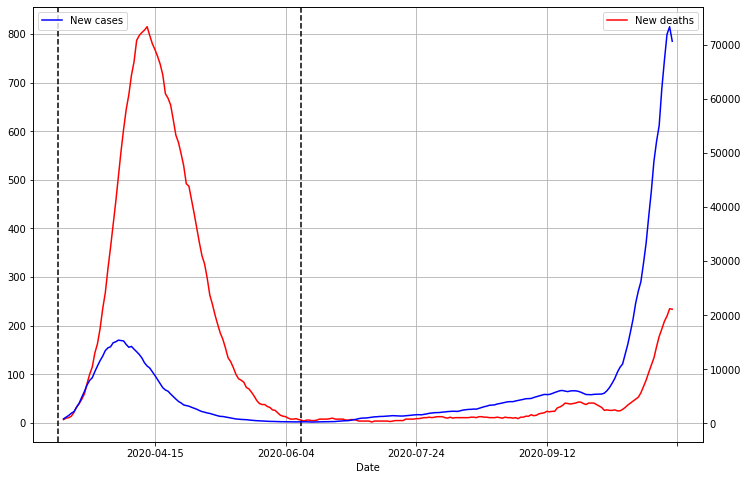

In [14]:
ax1 = newdeaths.set_index('Date').plot(color="red",kind="line",grid=True, label='New deaths',figsize=(12,8),logy=False)
ax2 = newcases.set_index('Date').plot(color="blue",kind="line",grid=True, label='New cases',secondary_y=True,ax=ax1,logy=False)

ax1.legend(["New deaths"],loc=1)
ax2.legend(["New cases"],loc=2)
#ax3.legend(["Hospitalizations"],loc=1)

ax1.axvline(13, color='k', linestyle='--',label="Interdiction des manifestations")

ax1.axvline(106, color='k', linestyle='--',label="Interdiction des manifestations")

plt.show()
fig = ax1.get_figure()
fig.savefig('deaths.jpg')

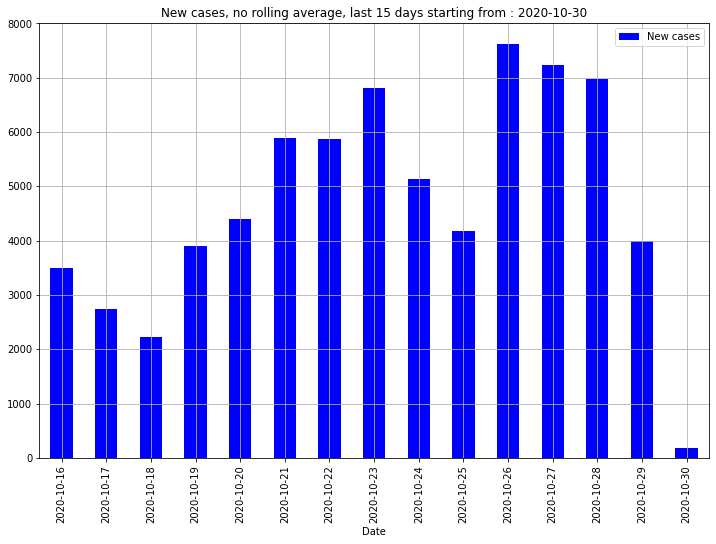

In [15]:
x = pd.DataFrame(covid_19_cases,columns=["Date"])
y = pd.DataFrame(covid_19_cases,columns=["CH"]).diff()
newcases = pd.concat([x,y],axis = 1)

pTitle = "New cases, no rolling average, last 15 days starting from : "+str(today)
ax1 = newcases.set_index('Date').tail(15).plot.bar(title =pTitle, color ="blue",grid = True,label='New deaths',figsize=(12,8))
ax1.legend(["New cases"],loc=1)
plt.show()
fig = ax1.get_figure()
fig.savefig('deaths_15.jpg')

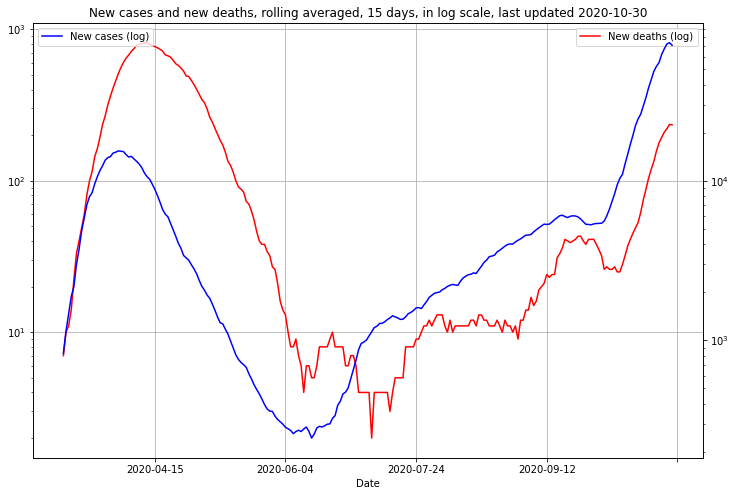

In [16]:
x = pd.DataFrame(covid_19_cases,columns=["Date"])
y = pd.DataFrame(covid_19_cases,columns=["CH"]).diff().rolling(15).sum()
newcases = pd.concat([x,y],axis = 1)


pTitle = "New cases and new deaths, rolling averaged, 15 days, in log scale, last updated "+str(today)

ax1 = newdeaths.set_index('Date').plot(title = pTitle,color="red",kind="line",grid=True, label='New deaths',figsize=(12,8),logy=True)
ax2 = newcases.set_index('Date').plot(color="blue",kind="line",grid=True, label='New cases',secondary_y=True,ax=ax1,logy=True)

ax1.legend(["New deaths (log)"],loc=1)
ax2.legend(["New cases (log)"],loc=2)

plt.show()
fig = ax1.get_figure()
fig.savefig('cases_deaths_log.jpg')

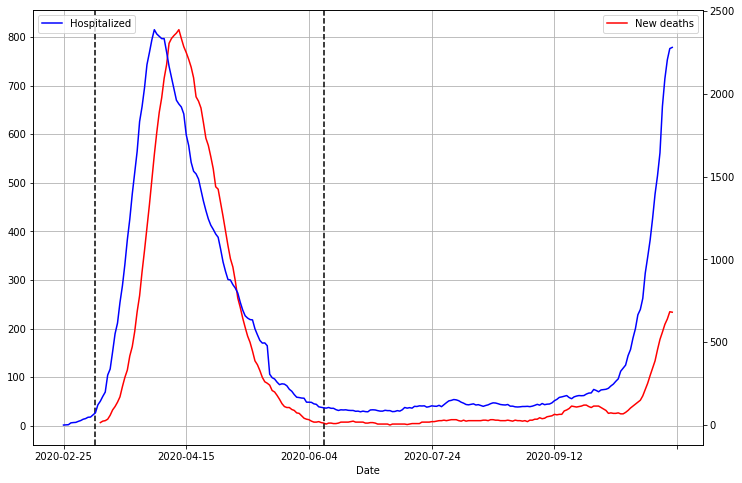

In [17]:
ax1 = newdeaths.set_index('Date').plot(color="red",kind="line",grid=True, label='New deaths',figsize=(12,8),logy=False)
ax2 = hospitalized.set_index('Date').plot(color="blue",kind="line",grid=True, label='New cases',secondary_y=True,ax=ax1,logy=False)


ax1.legend(["New deaths"],loc=1)
ax2.legend(["Hospitalized"],loc=2)
#ax3.legend(["Hospitalizations"],loc=1)

ax1.axvline(13, color='k', linestyle='--',label="Interdiction des manifestations")

ax1.axvline(106, color='k', linestyle='--',label="Interdiction des manifestations")

plt.show()
fig = ax1.get_figure()

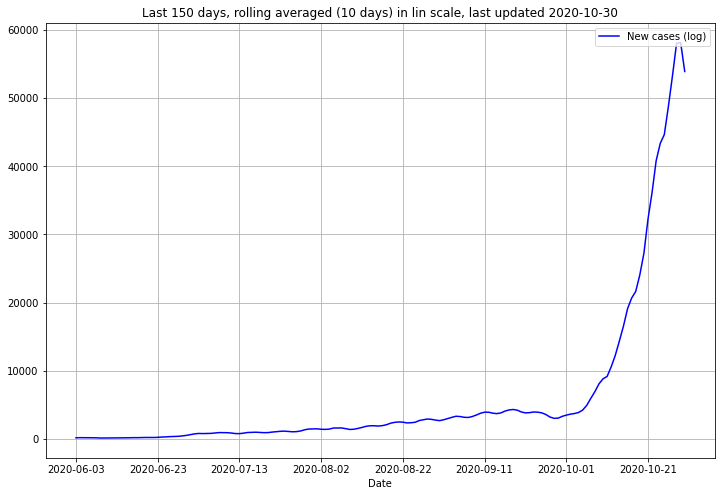

In [29]:
from scipy import optimize

size_tail = 150
avg = 10
logT = False

lgstr = "lin"
if logT:
    lgstr = "log"

x = pd.DataFrame(covid_19_cases,columns=["Date"])
y = pd.DataFrame(covid_19_cases,columns=["CH"]).diff().rolling(avg).sum()
newcases = pd.concat([x,y],axis = 1).tail(size_tail)


pTitle = "Last "+str(size_tail)+" days, rolling averaged ("+str(avg)+" days) in "+lgstr+" scale, last updated "+str(today)

ax1 = newcases.set_index('Date').plot(title = pTitle,color="blue",kind="line",grid=True, label='New deaths',figsize=(12,8),logy=logT)

ax1.legend(["New cases (log)"],loc=1)

plt.show()
fig = ax1.get_figure()
fig.savefig('fit.jpg')